### Capstone Project: Understanding the Battle Area, Sales of Digital Products and Services Case

A digital company wants to increase sales of its products and services to corporate customers. The products to be sold differ according to their respective customer segments (eg. restaurants, hotels, offices, etc.) and will be offered by different account managers according to customer segments. This company wants to know what customer segments are in its work area along with its location, with the aim of increasing the efficiency and effectiveness of the account managers' visits and sales to customers. 

The data to be used is the location data for restaurants, hotels, offices, etc., which are corporate customers in the Badung regency, Bali province, Indonesia based on Foursquare Geolocation Data. From this data, it will be grouped into clusters with different characteristics that will be matched based on customer segments. So that later it will help the visits and sales of account managers to customers to be more effective and efficient.

#### Import libraries

In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

#### Scrape data from Wikipedia page

In [425]:
#using beautifulsoup
url = 'https://en.wikipedia.org/wiki/List_of_districts_and_sub-districts_in_Badung_Regency'
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

village = []
listlink = soup.find_all("a", attrs={"class": "new"})
for link in listlink:
    village.append(format(link.text))

address = []
listlink = soup.find_all("a", attrs={"class": "new"})
for link in listlink:
    address.append(format(link.get("title")))

#convert lists to dataframe
df = pd.DataFrame(list(zip(village, address)), columns =['Area', 'Address'])

In [426]:
df

,Area,Address
0,Abiansemal,"Abiansemal, Abiansemal, Badung (page does not ..."
1,Angantaka,"Angantaka, Abiansemal, Badung (page does not e..."
2,Ayunan,"Ayunan, Abiansemal, Badung (page does not exist)"
3,Blahkiuh,"Blahkiuh, Abiansemal, Badung (page does not ex..."
4,Bongkasa,"Bongkasa, Abiansemal, Badung (page does not ex..."
...,...,...
58,Pangsan,"Pangsan, Petang, Badung (page does not exist)"
59,Pelaga,"Pelaga, Petang, Badung (page does not exist)"
60,Petang,"Petang, Petang, Badung (page does not exist)"
61,Sulangai,"Sulangai, Petang, Badung (page does not exist)"


#### Data Cleaning & Preparation

In [427]:
#select only village & subdistrict name from Address
getadd = df["Address"].str.split(", Badung", n = 1, expand = True)
getadd

,0,1
0,"Abiansemal, Abiansemal",(page does not exist)
1,"Angantaka, Abiansemal",(page does not exist)
2,"Ayunan, Abiansemal",(page does not exist)
3,"Blahkiuh, Abiansemal",(page does not exist)
4,"Bongkasa, Abiansemal",(page does not exist)
...,...,...
58,"Pangsan, Petang",(page does not exist)
59,"Pelaga, Petang",(page does not exist)
60,"Petang, Petang",(page does not exist)
61,"Sulangai, Petang",(page does not exist)


In [428]:
df["Address"]= getadd[0]
df

,Area,Address
0,Abiansemal,"Abiansemal, Abiansemal"
1,Angantaka,"Angantaka, Abiansemal"
2,Ayunan,"Ayunan, Abiansemal"
3,Blahkiuh,"Blahkiuh, Abiansemal"
4,Bongkasa,"Bongkasa, Abiansemal"
...,...,...
58,Pangsan,"Pangsan, Petang"
59,Pelaga,"Pelaga, Petang"
60,Petang,"Petang, Petang"
61,Sulangai,"Sulangai, Petang"


In [429]:
#remove duplicates
df.drop_duplicates(subset ="Area", keep = 'first', inplace = True)
df

,Area,Address
0,Abiansemal,"Abiansemal, Abiansemal"
1,Angantaka,"Angantaka, Abiansemal"
2,Ayunan,"Ayunan, Abiansemal"
3,Blahkiuh,"Blahkiuh, Abiansemal"
4,Bongkasa,"Bongkasa, Abiansemal"
...,...,...
57,Getasan,"Getasan, Petang"
58,Pangsan,"Pangsan, Petang"
59,Pelaga,"Pelaga, Petang"
60,Petang,"Petang, Petang"


### Add Latitude and Longitude Coordinate

In [151]:
#pip install geopy

In [430]:
from geopy.geocoders import Nominatim
locator = Nominatim(user_agent="myGeocoder")

df['Geocode'] = df.Address.apply(locator.geocode)
df

,Area,Address,Geocode
0,Abiansemal,"Abiansemal, Abiansemal",None
1,Angantaka,"Angantaka, Abiansemal","(Angantaka, Bali, 80238, Indonesia, (-8.582704..."
2,Ayunan,"Ayunan, Abiansemal","(Ayunan, Bali, 80352, Indonesia, (-8.5012648, ..."
3,Blahkiuh,"Blahkiuh, Abiansemal","(Blahkiuh, Bali, 80352, Indonesia, (-8.5108148..."
4,Bongkasa,"Bongkasa, Abiansemal","(Bongkasa, Bali, 80352, Indonesia, (-8.5002168..."
...,...,...,...
57,Getasan,"Getasan, Petang","(Getasan, Bali, Indonesia, (-8.4370221, 115.22..."
58,Pangsan,"Pangsan, Petang","(Pangsan, Bali, Indonesia, (-8.4191453, 115.22..."
59,Pelaga,"Pelaga, Petang","(Pelaga, Bali, Indonesia, (-8.2933747, 115.227..."
60,Petang,"Petang, Petang","(Petang, Bali, Indonesia, (-8.3959651, 115.218..."


In [431]:
#check the Area for which Geocode data doesn't show
df.loc[df['Geocode'].isna()]

,Area,Address,Geocode
0,Abiansemal,"Abiansemal, Abiansemal",None
8,Jagapati,"Jagapati, Abiansemal",None
10,Mekar Bhuana,"Mekar Bhuana, Abiansemal",None
33,Kerobokan Kelod,"Kerobokan Kelod, North Kuta",None
43,Munggu,"Munggu, Mengwi",None
55,Belok,"Belok, Petang",None


In [447]:
#try different name format for the location
location = locator.geocode("Kerobokan Kelod, North Kuta, Bali")

print("Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Latitude = -8.6579074, Longitude = 115.1757196


In [438]:
#rename the Address
df['Address'] = df['Address'].replace({'Abiansemal, Abiansemal': 'Abiansemal, Bali',
                                    'Jagapati, Abiansemal': 'Jaga Pati, Bali', 
                                    'Mekar Bhuana, Abiansemal': 'Mekar Bhuwana, Bali',
                                    'Kerobokan Kelod, North Kuta': 'Kerobokan Kelod, North Kuta, Bali',
                                    'Munggu, Mengwi': 'Munggu, Bali',
                                    'Belok, Petang': 'Belok, Bali'})

In [449]:
#get the geocode again
df['Geocode'] = df.Address.apply(locator.geocode)

In [450]:
#check again for empty Geocode data
df.loc[df['Geocode'].isna()]

,Area,Address,Latitude,Longitude,Geocode


In [451]:
#add latitude & longitude data
df['Latitude'] = [g.latitude for g in df.Geocode]
df['Longitude'] = [g.longitude for g in df.Geocode]

In [452]:
#remove Geocode column
df = df.drop(['Geocode'], axis=1)
df

,Area,Address,Latitude,Longitude
0,Abiansemal,"Abiansemal, Bali",-8.524942,115.211978
1,Angantaka,"Angantaka, Abiansemal",-8.582705,115.242242
2,Ayunan,"Ayunan, Abiansemal",-8.501265,115.198744
3,Blahkiuh,"Blahkiuh, Abiansemal",-8.510815,115.209893
4,Bongkasa,"Bongkasa, Abiansemal",-8.500217,115.231781
...,...,...,...,...
57,Getasan,"Getasan, Petang",-8.437022,115.221944
58,Pangsan,"Pangsan, Petang",-8.419145,115.222646
59,Pelaga,"Pelaga, Petang",-8.293375,115.227282
60,Petang,"Petang, Petang",-8.395965,115.218639


This data is the Neighborhood Data of Badung Regency, Bali that will be used for clustering and in this case, we're going to focus in Kuta Area.

### Visualization and Clustering

To view the map, please open it __[here](https://nbviewer.jupyter.org/github/kdbaskara/Coursera_Capstone/blob/main/Digital-Products-Battle-Area.ipynb)__

#### 1. Generate the map

#### Import libraries

In [152]:
import numpy as np
import json #library to handle JSON files

#!conda install -c conda-forge geopy --yes #uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim #convert an address into latitude and longitude values

import requests #library to handle requests
from pandas.io.json import json_normalize #tranform JSON file into a pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes #uncomment this line if you haven't completed the Foursquare API lab
import folium #map rendering library

#### Create a dataframe with only area that contain the word Kuta

In [453]:
kuta_data = df[df['Address'].str.contains('Kuta')].reset_index(drop=True)
kuta_data

,Area,Address,Latitude,Longitude
0,Kedonganan,"Kedonganan, Kuta",-8.762023,115.175418
1,Tuban,"Tuban, Kuta",-8.735319,115.176024
2,Kuta,"Kuta, Kuta",-8.727835,115.173005
3,Legian,"Legian, Kuta",-8.703338,115.168843
4,Seminyak,"Seminyak, Kuta",-8.690836,115.164198
5,Pecatu,"Pecatu, South Kuta",-8.826667,115.114961
6,Ungasan,"Ungasan, South Kuta",-8.828667,115.165426
7,Kutuh,"Kutuh, South Kuta",-8.832334,115.183949
8,Benoa,"Benoa, South Kuta",-8.800791,115.210545
9,Tanjung Benoa,"Tanjung Benoa, South Kuta",-8.765740,115.223256


#### Get latitude and longitude values of Kuta, Bali

In [464]:
address = 'Kuta'

locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Kuta, Bali are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Kuta, Bali are -8.7278354, 115.1730049.


#### Create a map of Kuta with marker

In [465]:
#create map of Kuta using latitude and longitude values
map_kuta = folium.Map(location=[latitude, longitude], zoom_start=11)

#add markers to map
for lat, lng, neighborhood in zip(kuta_data['Latitude'], kuta_data['Longitude'], kuta_data['Area']):
    label = '{}, {}, {}'.format(neighborhood, lat, lng)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kuta)  
    
map_kuta

#### 2. Use Foursquare API to get venues in the neighbourhoods

#### Define Foursquare Credentials and Version

In [469]:
CLIENT_ID = '' #your Foursquare ID
CLIENT_SECRET = '' #your Foursquare Secret
VERSION = '' #Foursquare API version
LIMIT = 100 #A default Foursquare API limit value

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

#### Explore first neighborhood in the dataframe and get the latitude and longitude values

In [470]:
kuta_data.loc[0,'Address']

'Kedonganan, Kuta'

In [471]:
neighborhood_latitude = kuta_data.loc[0, 'Latitude'] #neighborhood latitude value
neighborhood_longitude = kuta_data.loc[0, 'Longitude'] #neighborhood longitude value

neighborhood_name = kuta_data.loc[0, 'Address'] #neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Kedonganan, Kuta are -8.7620233, 115.1754182.


#### Get the top 100 venues that are in Kedonganan, Kuta within a radius of 500 meters

##### Create the GET request URL

In [472]:
LIMIT = 100 #limit of number of venues returned by Foursquare API
radius = 500 #define radius

#create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
#url #display URL

##### Send GET request

In [473]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '603dfc4cacfb3503b60f394e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Kedunganan',
  'headerFullLocation': 'Kedunganan',
  'headerLocationGranularity': 'city',
  'totalResults': 16,
  'suggestedBounds': {'ne': {'lat': -8.757523295499995,
    'lng': 115.17996284040164},
   'sw': {'lat': -8.766523304500003, 'lng': 115.17087355959835}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5521f788498e84e707556075',
       'name': 'Watermark Hotel & Spa Bali Jimbaran',
       'location': {'address': 'Jl. Uluwatu 88',
        'lat': -8.760944874148223,
        'lng': 115.17569661140443,
        'labeledLatLngs': [{'label': 'display',
          'lat'

##### Define a function to extract the venue's category and name

In [474]:
#function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

##### Clean the JSON and build it as a dataframe

In [475]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) #flatten JSON

#filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

#filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

#clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Watermark Hotel & Spa Bali Jimbaran,Resort,-8.760945,115.175697
1,Horison Hotel Jimbaran,Hotel,-8.762752,115.175367
2,Puri Bambu Hotel Bali,Hotel Pool,-8.763126,115.172956
3,clandys kedonganan,Hunting Supply,-8.763290,115.178874
4,Babi Guling Karya Rebo,BBQ Joint,-8.760866,115.176091


In [476]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

16 venues were returned by Foursquare.


#### 3. Explore the neighbourhoods in Kuta

#### Define a function to extract the venue's category and name in all the neighborhoods in Kuta

In [335]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        #create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        #make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the function and create a new dataframe

In [477]:
kuta_venues = getNearbyVenues(names=kuta_data['Address'],
                                   latitudes=kuta_data['Latitude'],
                                   longitudes=kuta_data['Longitude']
                                  )
kuta_venues.head()

Kedonganan, Kuta
Tuban, Kuta
Kuta, Kuta
Legian, Kuta
Seminyak, Kuta
Pecatu, South Kuta
Ungasan, South Kuta
Kutuh, South Kuta
Benoa, South Kuta
Tanjung Benoa, South Kuta
Jimbaran, South Kuta
Canggu, North Kuta
Dalung, North Kuta
Tibubeneng, North Kuta
Kerobokan, North Kuta
Kerobokan Kelod, North Kuta, Bali
Kerobokan Kaja, North Kuta


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Kedonganan, Kuta",-8.762023,115.175418,Watermark Hotel & Spa Bali Jimbaran,-8.760945,115.175697,Resort
1,"Kedonganan, Kuta",-8.762023,115.175418,Horison Hotel Jimbaran,-8.762752,115.175367,Hotel
2,"Kedonganan, Kuta",-8.762023,115.175418,Puri Bambu Hotel Bali,-8.763126,115.172956,Hotel Pool
3,"Kedonganan, Kuta",-8.762023,115.175418,clandys kedonganan,-8.763290,115.178874,Hunting Supply
4,"Kedonganan, Kuta",-8.762023,115.175418,Babi Guling Karya Rebo,-8.760866,115.176091,BBQ Joint


#### Check how many venues were returned for each neighbourhood

In [478]:
kuta_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Benoa, South Kuta",5,5,5,5,5,5
"Canggu, North Kuta",46,46,46,46,46,46
"Dalung, North Kuta",1,1,1,1,1,1
"Jimbaran, South Kuta",26,26,26,26,26,26
"Kedonganan, Kuta",16,16,16,16,16,16
"Kerobokan Kaja, North Kuta",8,8,8,8,8,8
"Kerobokan Kelod, North Kuta, Bali",1,1,1,1,1,1
"Kerobokan, North Kuta",11,11,11,11,11,11
"Kuta, Kuta",37,37,37,37,37,37


#### Check how many unique categories were returned

In [479]:
print('There are {} uniques categories.'.format(len(kuta_venues['Venue Category'].unique())))

There are 92 uniques categories.


#### 4. Analyze each neighbourhood

In [480]:
#one hot encoding
kuta_onehot = pd.get_dummies(kuta_venues[['Venue Category']], prefix="", prefix_sep="")

#add neighbourhood column back to dataframe
kuta_onehot['Neighbourhood'] = kuta_venues['Neighbourhood'] 

#move neighbourhood column to the first column
fixed_columns = [kuta_onehot.columns[-1]] + list(kuta_onehot.columns[:-1])
kuta_onehot = kuta_onehot[fixed_columns]

kuta_onehot.head()

,Neighbourhood,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Balinese Restaurant,Bar,Basketball Stadium,Beach,...,Sundanese Restaurant,Surf Spot,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Vegetarian / Vegan Restaurant,Water Park,Yoga Studio
0,"Kedonganan, Kuta",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Kedonganan, Kuta",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Kedonganan, Kuta",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Kedonganan, Kuta",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Kedonganan, Kuta",0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Examine the size

In [481]:
kuta_onehot.shape

(354, 93)

#### Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category

In [482]:
kuta_grouped = kuta_onehot.groupby('Neighbourhood').mean().reset_index()
kuta_grouped

,Neighbourhood,American Restaurant,Art Gallery,Asian Restaurant,BBQ Joint,Bakery,Balinese Restaurant,Bar,Basketball Stadium,Beach,...,Sundanese Restaurant,Surf Spot,Sushi Restaurant,Swiss Restaurant,Tapas Restaurant,Theme Park Ride / Attraction,Theme Restaurant,Vegetarian / Vegan Restaurant,Water Park,Yoga Studio
0,"Benoa, South Kuta",0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Canggu, North Kuta",0.000000,0.000000,0.021739,0.000,0.021739,0.065217,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.021739,0.065217,0.000000,0.021739
2,"Dalung, North Kuta",0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,"Jimbaran, South Kuta",0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.038462,...,0.000000,0.000000,0.000000,0.00000,0.076923,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Kedonganan, Kuta",0.000000,0.000000,0.000000,0.125,0.000000,0.062500,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Kerobokan Kaja, North Kuta",0.000000,0.000000,0.250000,0.000,0.125000,0.000000,0.000000,0.125,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Kerobokan Kelod, North Kuta, Bali",0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Kerobokan, North Kuta",0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,"Kuta, Kuta",0.027027,0.000000,0.027027,0.000,0.000000,0.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.027027,0.000000,0.000000,0.027027,0.000000
9,"Kutuh, South Kuta",0.000000,0.000000,0.000000,0.000,0.000000,1.000000,0.000000,0.000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Examine the new size

In [483]:
kuta_grouped.shape

(17, 93)

#### Print each neighbourhood along with the top 5 most common venues

In [484]:
num_top_venues = 5

for hood in kuta_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = kuta_grouped[kuta_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Benoa, South Kuta----
                   venue  freq
0           Noodle House   0.2
1  Indonesian Restaurant   0.2
2                    Gym   0.2
3          Grocery Store   0.2
4       Sushi Restaurant   0.2


----Canggu, North Kuta----
                           venue  freq
0                           Café  0.13
1                     Restaurant  0.13
2                          Hotel  0.09
3            Balinese Restaurant  0.07
4  Vegetarian / Vegan Restaurant  0.07


----Dalung, North Kuta----
                       venue  freq
0          Convenience Store   1.0
1        American Restaurant   0.0
2  Middle Eastern Restaurant   0.0
3                Pizza Place   0.0
4                  Pet Store   0.0


----Jimbaran, South Kuta----
                   venue  freq
0     Seafood Restaurant  0.31
1                  Hotel  0.19
2                 Resort  0.12
3       Tapas Restaurant  0.08
4  Indonesian Restaurant  0.04


----Kedonganan, Kuta----
                   venue  freq
0          

#### Put the result into a pandas dataframe

##### Define a function to sort the venues in descending order

In [344]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Create the new dataframe and display the top 10 venues for each neighbourhood

In [498]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

#create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

#create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = kuta_grouped['Neighbourhood']

for ind in np.arange(kuta_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(kuta_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Benoa, South Kuta",Gym,Grocery Store,Noodle House,Sushi Restaurant,Indonesian Restaurant,Eastern European Restaurant,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Department Store
1,"Canggu, North Kuta",Restaurant,Café,Hotel,Vegetarian / Vegan Restaurant,Balinese Restaurant,Breakfast Spot,Burger Joint,Spa,Ice Cream Shop,Motorcycle Shop
2,"Dalung, North Kuta",Convenience Store,Yoga Studio,Fish Market,Comfort Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant
3,"Jimbaran, South Kuta",Seafood Restaurant,Hotel,Resort,Tapas Restaurant,Breakfast Spot,Chinese Restaurant,Department Store,Food Court,Indonesian Restaurant,Beach
4,"Kedonganan, Kuta",BBQ Joint,Indonesian Restaurant,Hotel,Steakhouse,Clothing Store,Resort,Fast Food Restaurant,Shopping Mall,Food Truck,Convenience Store


#### 5. Cluster neighbourhoods

##### Run K-means to cluster the neighbourhoods

In [501]:
# set number of clusters
kclusters = 4

kuta_grouped_clustering = kuta_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(kuta_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 0, 0, 0, 1, 0, 0, 3])

##### Determine the optimal value of K in K-Means Clustering

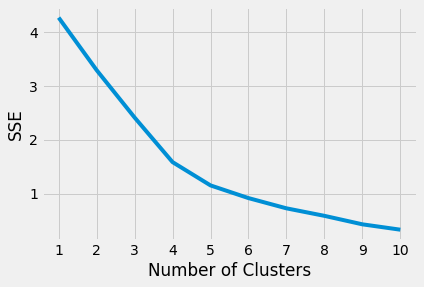

The optimal value of K is 4 .


In [500]:
#!conda install -c conda-forge kneed --yes 
from kneed import KneeLocator
import matplotlib.pyplot as plt

#store the sse value for each K
sse =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, random_state=0) 
    KM.fit(kuta_grouped_clustering) 
    sse.append(KM.inertia_)      

#plot the sse against K values
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters") 
plt.ylabel("SSE") 
plt.show() 

#identify the elbow point
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print('The optimal value of K is {} .'.format(kl.elbow))

Run K-means Clustering again with the optimal value of K

##### Create a new dataframe that includes the cluster as well as the top 10 venues for each neighbourhood

In [503]:
# reset the cluster labels
#del neighbourhoods_venues_sorted['Cluster Labels']

# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

kuta_merged = kuta_data

# merge badung_grouped with df to add latitude/longitude for each neighbourhood
kuta_merged = kuta_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Address')

kuta_merged.head()

,Area,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kedonganan,"Kedonganan, Kuta",-8.762023,115.175418,0,BBQ Joint,Indonesian Restaurant,Hotel,Steakhouse,Clothing Store,Resort,Fast Food Restaurant,Shopping Mall,Food Truck,Convenience Store
1,Tuban,"Tuban, Kuta",-8.735319,115.176024,0,Asian Restaurant,Indonesian Restaurant,Hotel,Chinese Restaurant,Gift Shop,Convenience Store,Seafood Restaurant,Coffee Shop,Massage Studio,Multiplex
2,Kuta,"Kuta, Kuta",-8.727835,115.173005,0,Hotel,Resort,Japanese Restaurant,Indonesian Restaurant,Convenience Store,Shopping Mall,Fried Chicken Joint,Mediterranean Restaurant,Italian Restaurant,Ice Cream Shop
3,Legian,"Legian, Kuta",-8.703338,115.168843,0,Hotel,Coffee Shop,Restaurant,Italian Restaurant,Convenience Store,Café,Pub,Resort,Fried Chicken Joint,Hostel
4,Seminyak,"Seminyak, Kuta",-8.690836,115.164198,0,Hotel,Resort,Café,Spa,Asian Restaurant,Gay Bar,Italian Restaurant,Burger Joint,Restaurant,Diner


##### Visualize the clusters using a map

In [504]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kuta_merged['Latitude'], kuta_merged['Longitude'], kuta_merged['Address'], kuta_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### 6. Examine Clusters

##### Cluster 1

In [505]:
kuta_merged.loc[kuta_merged['Cluster Labels'] == 0, kuta_merged.columns[list(range(0, kuta_merged.shape[1]))]]

,Area,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Kedonganan,"Kedonganan, Kuta",-8.762023,115.175418,0,BBQ Joint,Indonesian Restaurant,Hotel,Steakhouse,Clothing Store,Resort,Fast Food Restaurant,Shopping Mall,Food Truck,Convenience Store
1,Tuban,"Tuban, Kuta",-8.735319,115.176024,0,Asian Restaurant,Indonesian Restaurant,Hotel,Chinese Restaurant,Gift Shop,Convenience Store,Seafood Restaurant,Coffee Shop,Massage Studio,Multiplex
2,Kuta,"Kuta, Kuta",-8.727835,115.173005,0,Hotel,Resort,Japanese Restaurant,Indonesian Restaurant,Convenience Store,Shopping Mall,Fried Chicken Joint,Mediterranean Restaurant,Italian Restaurant,Ice Cream Shop
3,Legian,"Legian, Kuta",-8.703338,115.168843,0,Hotel,Coffee Shop,Restaurant,Italian Restaurant,Convenience Store,Café,Pub,Resort,Fried Chicken Joint,Hostel
4,Seminyak,"Seminyak, Kuta",-8.690836,115.164198,0,Hotel,Resort,Café,Spa,Asian Restaurant,Gay Bar,Italian Restaurant,Burger Joint,Restaurant,Diner
5,Pecatu,"Pecatu, South Kuta",-8.826667,115.114961,0,Bike Trail,Resort,Cocktail Bar,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop
6,Ungasan,"Ungasan, South Kuta",-8.828667,115.165426,0,Resort,Convenience Store,Indonesian Restaurant,Market,Yoga Studio,Fast Food Restaurant,Comfort Food Restaurant,Cupcake Shop,Department Store,Dessert Shop
8,Benoa,"Benoa, South Kuta",-8.800791,115.210545,0,Gym,Grocery Store,Noodle House,Sushi Restaurant,Indonesian Restaurant,Eastern European Restaurant,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Department Store
9,Tanjung Benoa,"Tanjung Benoa, South Kuta",-8.765740,115.223256,0,Resort,Hotel,Indonesian Restaurant,Beach,Water Park,Bar,Gym,Restaurant,Coffee Shop,Spa
10,Jimbaran,"Jimbaran, South Kuta",-8.772490,115.172394,0,Seafood Restaurant,Hotel,Resort,Tapas Restaurant,Breakfast Spot,Chinese Restaurant,Department Store,Food Court,Indonesian Restaurant,Beach


#### Cluster 1 mostly consists of venues such as Hotel, Resort, & Restaurant, let's call this cluster "Tourism Cluster".

##### Cluster 2

In [506]:
kuta_merged.loc[kuta_merged['Cluster Labels'] == 1, kuta_merged.columns[list(range(0, kuta_merged.shape[1]))]]

,Area,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Kerobokan Kelod,"Kerobokan Kelod, North Kuta, Bali",-8.657907,115.17572,1,Indonesian Restaurant,Yoga Studio,Fish Market,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop


#### Cluster 2 consists of venues such as Indonesian Restaurant & Food Shop, let's call this cluster "Culinary Cluster".

##### Cluster 3

In [507]:
kuta_merged.loc[kuta_merged['Cluster Labels'] == 2, kuta_merged.columns[list(range(0, kuta_merged.shape[1]))]]

,Area,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Dalung,"Dalung, North Kuta",-8.618856,115.170468,2,Convenience Store,Yoga Studio,Fish Market,Comfort Food Restaurant,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant


#### Cluster 3 consists of venues such as Convenience Store & Food Shop, let's call this cluster "Residential Cluster".

##### Cluster 4

In [508]:
kuta_merged.loc[kuta_merged['Cluster Labels'] == 3, kuta_merged.columns[list(range(0, kuta_merged.shape[1]))]]

,Area,Address,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Kutuh,"Kutuh, South Kuta",-8.832334,115.183949,3,Balinese Restaurant,Yoga Studio,Food & Drink Shop,Convenience Store,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Eastern European Restaurant


#### Cluster 4 consists of venues such as Balinese Restaurant & Food Shop, let's call this cluster "Traditional Cluster".